In [1]:
import numpy as np
import pandas as pd

import os, glob

from collections import OrderedDict

import matplotlib
import matplotlib.pyplot as plt

import ipywidgets as widgets
from traitlets import dlink
from IPython.display import display

from pyrixs import process2d

%matplotlib nbagg

In [2]:
global Image
Image = OrderedDict({
'photon_events' : np.array([]),
'name' : '',
'curvature' : np.array([0, 0, 500]),
'image_meta' : '',
'spectrum' : np.array([])
})

In [3]:
######################################
# Widgets
######################################

# Folder to search images for
images_folder_widget = widgets.Text(
    value='test_images/*.h5',  
    description='Search path',
    width='500px',
)

# Display and pick which spectra to plot
select_images_widget = widgets.Select(
            options=process2d.get_all_image_names(images_folder_widget.value),
            description='Select images'
            )

display_image_button = widgets.Button(
    description='Plot',
)

x2_widget = widgets.FloatText(description='x^2', value=Image['curvature'][0])
x1_widget = widgets.FloatText(description='x^1', value=Image['curvature'][1])
x0_widget = widgets.FloatText(description='x^0', value=Image['curvature'][2])

fit_curvature_button = widgets.Button(
    description='Fit',
)

plot_resolution_button = widgets.Button(
    description='Plot',
)

names = ['FWHM', 'center', 'amplitude', 'offset']
values = [3., 100., 10, 0.]
params_widget = widgets.HBox([widgets.FloatText(description=name, value=value, width='150px') 
                              for name, value in zip(names, values)])

fit_resolution_button = widgets.Button(
    description='Fit',
)

In [4]:
###########################
## Widget logic
###########################
def update_select_images_widget(change):
    """Refresh images for selection"""
    select_images_widget.options = process2d.get_all_image_names(images_folder_widget.value)
    
images_folder_widget.on_submit(update_select_images_widget)

def wrap_display_image(change):
    """Load and plot images and curvature"""
    photon_events = process2d.load_image(images_folder_widget.value,
                                         select_images_widget.value)
    Image['photon_events'] = photon_events
    image_artist = process2d.plot_image(ax1, photon_events, alpha=0.5, s=1)
    process2d.plot_curvature(ax1, Image['curvature'], photon_events)

display_image_button.on_click(wrap_display_image)

def wrap_curvature(change):
    """Assign values in curvature widget to Images['curvature']"""
    Image['curvature'] = np.array([x2_widget.value, x1_widget.value, x0_widget.value])

x2_widget.observe(wrap_curvature)
x1_widget.observe(wrap_curvature)
x0_widget.observe(wrap_curvature)
    
def wrap_fit_curvature(change):
    """Fit the curvature and assign values into widgets"""
    curvature = process2d.fit_curvature(Image['photon_events'])
    Image['curvature'] = curvature
    x2_widget.value = curvature[0]
    x1_widget.value = curvature[1]
    print("x^2 value {}".format(curvature[0]))
    print("x^1 value {}".format(curvature[1]))
    #wrap_curvature(None)
    wrap_display_image(None)

fit_curvature_button.on_click(wrap_fit_curvature)        
        
def wrap_plot_resolution(change):
    """Extract the spectrum and plot it on ax2"""
    spectrum = process2d.extract(Image['photon_events'],
                                Image['curvature'])
    Image['spectrum'] = spectrum
    process2d.plot_resolution(ax2, spectrum)

plot_resolution_button.on_click(wrap_plot_resolution)

def wrap_fit_resolution(change):
    xmin, xmax, _, _ = ax2.axis()
    resolution = process2d.fit_resolution(Image['spectrum'], xmin=xmin, xmax=xmax)
    for widget, value in zip(params_widget.children, resolution):
        widget.value = value
    
    try:
        resolution_line.remove()
    except NameError:
        pass
    resolution_line, *_ = process2d.plot_resolution_fit(ax2, Image['spectrum'], resolution,
                                  xmin=xmin, xmax=xmax)

fit_resolution_button.on_click(wrap_fit_resolution)

## List and choose image

In [5]:
display(images_folder_widget, select_images_widget)

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


## Plot image

<IPython.core.display.Javascript object>


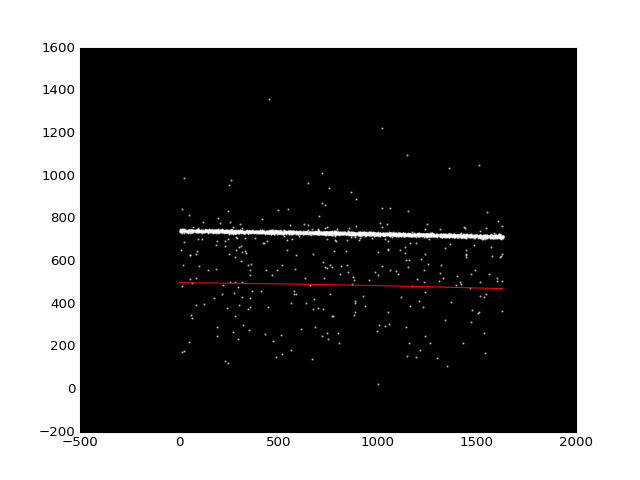

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


None

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


x^2 value -5.4643455222626294e-06
x^1 value -0.008339046187411448


In [6]:
plt.figure()
ax1 = plt.subplot(111)
ax1.hold(False)

display(display(widgets.HBox((x2_widget, x1_widget, x0_widget), width='50%')),
        widgets.HBox((display_image_button, fit_curvature_button)))

## Plot resolution

<IPython.core.display.Javascript object>


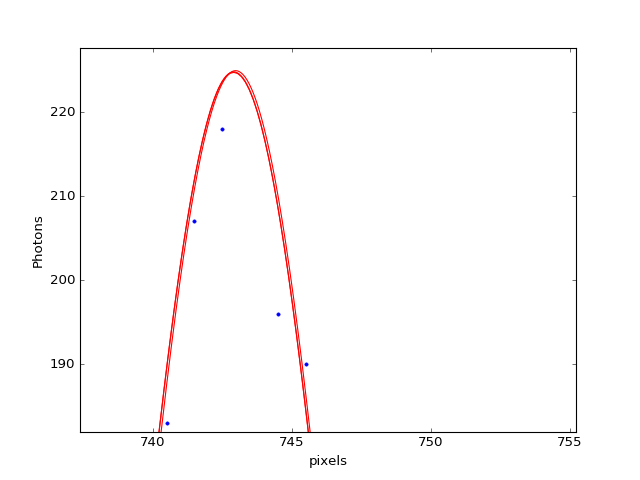

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"
Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [7]:
plt.figure()
ax2 = plt.subplot(111)
ax2.hold(False)

display(params_widget)
display(widgets.HBox([plot_resolution_button, fit_resolution_button]))

In [10]:
import pyrixs

In [11]:
pyrixs.__v

'pyrixs'

In [8]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [9]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show/hide code."></form>''')